# This Script Explores the Gradient Descent Process Which Underlies Logistic Regression

Data Pulled from this [Article](https://towardsdatascience.com/logistic-regression-with-python-using-optimization-function-91bd2aee79b)

In [1]:
#making necessary imports pulling data from csv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading CSV
df = pd.read_csv('Logistic_Regression_Data.csv')

#pulling all data
X_data = df['X_Data']
Y_data = df['Y_Data']
Classification_data = df['Classification']

# For Logistic Regression, We Operate With The Following Equations

Predictor:

$\hat{y}(z) = \frac{1}{1+e^{-z}}$

Within this sigmoidal predictor function, z is our collection of weights and bias:

$z = b + w_1x_1 + w_2x_2 + w_3x_3... w_nx_n$

For This Case, since we are working with only 2 input variables (x & y), our z term will collapse to:

$z = b + w_1x + w_2y $


Error Function:

$ Error = -\frac{1}{n}\sum_{i=1}^{n} Y_i \ln(\hat{y}_i) + (1-Y_i) \ln(1-\hat{y}_i) $

Partial Cost Function With Respect to Weights:

$\frac{\partial Error}{\partial w_n} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}(x_i) - Y_i)x_j^i$

Since We have 2 Weights, Our Cost Functions Are:

$\frac{\partial Error}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}(x_i,y_i) - Y_i)x_i$


$\frac{\partial Error}{\partial w_2} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}(x_i,y_i) - Y_i)y_i$



Partial Cost Function With Respect to Bias:

$\frac{\partial Error}{\partial b} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}(x_i,y_i) - Y_i)$

Updating Parameters:

$parameter_{new} = parameter_{old} - LearningRate*\frac{\partial Error}{\partial parameter_{old}}$

In [2]:
def predictor_function(x_datapoint,y_datapoint,weight_1,weight_2,bias):
    """
    This function computes our continuous classification prediction given x/y input datapoints & parameter values
    """
    z = bias + weight_1*x_datapoint + weight_2*y_datapoint
    return 1/(1 + np.exp(-1*z))

In [3]:
def error_function(x_data,y_data,classification_data,weight_1,weight_2,bias):
    """
    This function computes the overall error of our model which takes in x/y inputs and returns a prediction for classification
    """
    return -1/len(classification_data)*sum([classification_dp*np.log(predictor_function(x_dp,y_dp,weight_1,weight_2,bias))
                                            + (1-classification_dp)*np.log(1-(predictor_function(x_dp,y_dp,weight_1,weight_2,bias)))
                                           for x_dp,y_dp,classification_dp in zip(x_data,y_data,classification_data)])

In [4]:
def partial_cost_wrt_weight1(x_data,y_data,classification_data,weight_1,weight_2,bias):
    """
    This function computes the partial derivative of the cost function with respect to weight 1
    """
    return 1/len(classification_data)*sum([(predictor_function(x_dp,y_dp,weight_1,weight_2,bias) - classification_dp)*x_dp
                    for x_dp,y_dp,classification_dp in zip(x_data,y_data,classification_data)])

In [5]:
def partial_cost_wrt_weight2(x_data,y_data,classification_data,weight_1,weight_2,bias):
    """
    This function computes the partial derivative of the cost function with respect to weight 2
    """
    return 1/len(classification_data)*sum([(predictor_function(x_dp,y_dp,weight_1,weight_2,bias) - classification_dp)*y_dp
                    for x_dp,y_dp,classification_dp in zip(x_data,y_data,classification_data)])

In [6]:
def partial_cost_wrt_bias(x_data,y_data,classification_data,weight_1,weight_2,bias):
    """
    This function computes the partial derivative of the cost function with respect to the bias term
    """
    return 1/len(classification_data)*sum([(predictor_function(x_dp,y_dp,weight_1,weight_2,bias) - classification_dp)
                    for x_dp,y_dp,classification_dp in zip(x_data,y_data,classification_data)])

In [7]:
def update_parameters(x_data,y_data,classification_data,weight_1_current,weight_2_current,bias_current,learning_rate):
    """
    This function updates all parameters so we can perform iterative Gradient Descent
    """
    weight1_new = weight_1_current - learning_rate*partial_cost_wrt_weight1(x_data,y_data,classification_data,weight_1_current,weight_2_current,bias_current)
    weight2_new = weight_2_current - learning_rate*partial_cost_wrt_weight2(x_data,y_data,classification_data,weight_1_current,weight_2_current,bias_current)
    bias_new = bias_current - learning_rate*partial_cost_wrt_bias(x_data,y_data,classification_data,weight_1_current,weight_2_current,bias_current)
    return weight1_new, weight2_new, bias_new

# Performing Iterative Gradient Descent for Logistic Regression on this Dataset

In [8]:
#hard coding a learning rate & a # of model training epochs
learn_rate = 0.0001
epochs = 20000

#setting our initial parameter values to random numbers on the bounds [1,5]
w1, w2, b = 0,0,0

#initilizing logs of our parameters of interest
w1_log = [0]*epochs
w2_log = [0]*epochs
b_log = [0]*epochs
partial_w1_log = [0]*epochs
partial_w2_log = [0]*epochs
partial_b_log = [0]*epochs
error_log = [0]*epochs

#optimizing our model

for epoch in range(epochs):
    #calculating the partial derivative of our cost function wrt each parameter:
    partial_w1 = partial_cost_wrt_weight1(X_data,Y_data,Classification_data,w1,w2,b)
    partial_w2 = partial_cost_wrt_weight2(X_data,Y_data,Classification_data,w1,w2,b)
    partial_b = partial_cost_wrt_bias(X_data,Y_data,Classification_data,w1,w2,b)

    #logging the partial derivative values:
    partial_w1_log[epoch] = partial_w1
    partial_w2_log[epoch] = partial_w2
    partial_b_log[epoch] = partial_b

    #updating our parameter values:
    w1, w2, b = update_parameters(X_data,Y_data,Classification_data,w1,w2,b,learn_rate)

    #logging the parameter values
    w1_log[epoch] = w1
    w2_log[epoch] = w2
    b_log[epoch] = b

    #calculating and logging the error
    error = error_function(X_data,Y_data,Classification_data,w1,w2,b)
    error_log[epoch] = error

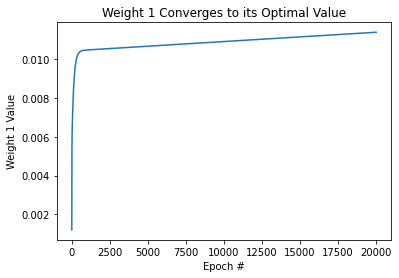

In [9]:
#plotting weight 1 value vs # of epochs

plt.plot(np.arange(epochs),w1_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 1 Value')
plt.title('Weight 1 Converges to its Optimal Value')
plt.show()

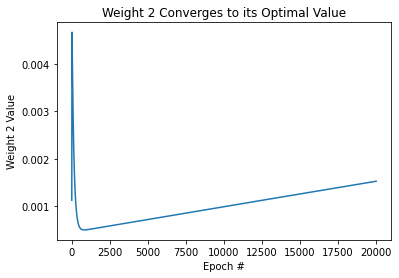

In [10]:
#plotting weight 2 value vs # of epochs

plt.plot(np.arange(epochs),w2_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 2 Value')
plt.title('Weight 2 Converges to its Optimal Value')
plt.show()

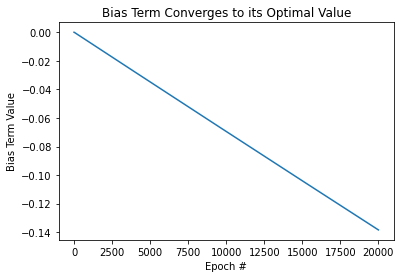

In [11]:
#plotting bias term value vs # of epochs

plt.plot(np.arange(epochs),b_log)
plt.xlabel('Epoch #')
plt.ylabel('Bias Term Value')
plt.title('Bias Term Converges to its Optimal Value')
plt.show()

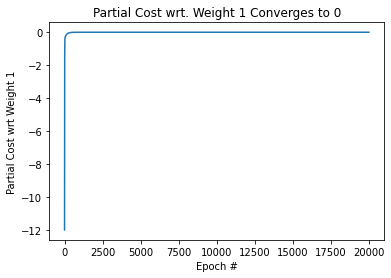

In [12]:
#plotting Partial Derivative of Cost wrt Weight 1 vs # of epochs

plt.plot(np.arange(epochs),partial_w1_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 1')
plt.title('Partial Cost wrt. Weight 1 Converges to 0')
plt.show()

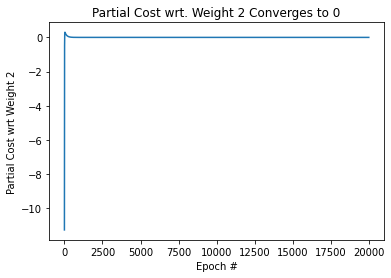

In [13]:
#plotting Partial Derivative of Cost wrt Weight 2 vs # of epochs

plt.plot(np.arange(epochs),partial_w2_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 2')
plt.title('Partial Cost wrt. Weight 2 Converges to 0')
plt.show()

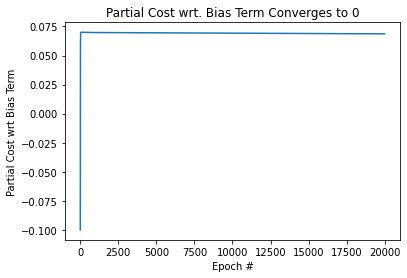

In [14]:
#plotting Partial Derivative of Cost wrt Bias Term vs # of epochs

plt.plot(np.arange(epochs),partial_b_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Bias Term')
plt.title('Partial Cost wrt. Bias Term Converges to 0')
plt.show()

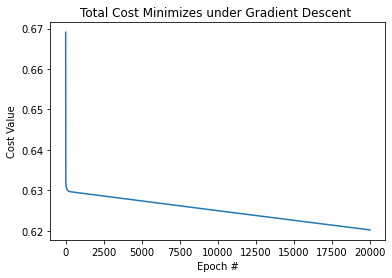

In [15]:
#plotting Cost vs # of epochs

plt.plot(np.arange(epochs),error_log)
plt.xlabel('Epoch #')
plt.ylabel('Cost Value')
plt.title('Total Cost Minimizes under Gradient Descent ')
plt.show()

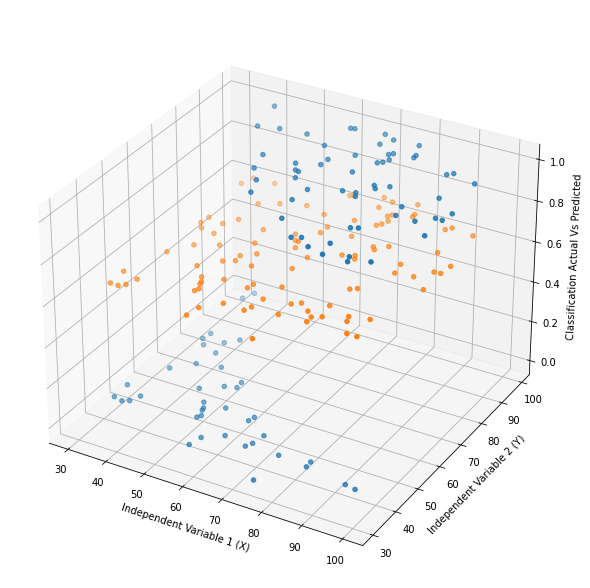

In [16]:
#plotting Our Optimized Predictor Function using input x/y data
w1_opt = w1_log[-1]
w2_opt = w2_log[-1]
b_opt = b_log[-1]

#pulling our optimized predictions
predicts = [predictor_function(x_point,y_point,w1_opt,w2_opt,b_opt) for x_point,y_point in zip(X_data,Y_data)]

#plotting our predictions vs actual classification data:
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')
ax.scatter(X_data, Y_data, Classification_data, 'gray')
ax.scatter(X_data, Y_data, predicts, 'red')

#setting labels
ax.set_xlabel('Independent Variable 1 (X)')
ax.set_ylabel('Independent Variable 2 (Y)')
ax.set_zlabel('Classification Actual Vs Predicted')

plt.title('Plot of Our Optimized Logistic Regression Model Predictions', color='white')
plt.show()


In [17]:
#Calculating our model accuracy against the training data
right_predicts = 0

for x,y,c_dp in zip(X_data,Y_data,Classification_data):
    prediction = predictor_function(x,y,w1_opt,w2_opt,b_opt)
    if c_dp == 1 and 0.5<=prediction<=1:
        right_predicts+=1
    elif c_dp == 0 and 0<=prediction<0.5:
        right_predicts+=1
    else:
        pass

print(f'This Logistic Regression Model has an overall accuracy of {round(right_predicts/len(Classification_data)*100,4)}%')
print(f'Optimized Weight 1 Value: {w1_opt} | Optimized Weight 2 Value: {w2_opt} | Optimized Bias Term Value: {b_opt}')


This Logistic Regression Model has an overall accuracy of 60.0%
Optimized Weight 1 Value: 0.01138619586633299 | Optimized Weight 2 Value: 0.0015273537294658752 | Optimized Bias Term Value: -0.1383857328017574
